## Car Prices Analysis

In [1]:
## Dataset internette bulunabilir
## KAGGLE da bulunabilir

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow import keras
import seaborn as sbn

In [3]:
dataFrame = pd.read_excel("merc.xlsx")

In [4]:
dataFrame

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0
...,...,...,...,...,...,...,...
13114,2020,35999,Automatic,500,145,55.4,2.0
13115,2020,24699,Automatic,2500,145,55.4,2.0
13116,2019,30999,Automatic,11612,145,41.5,2.1
13117,2019,37990,Automatic,2426,145,45.6,2.0


In [5]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [6]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [7]:
dataFrame.isnull().sum() # veri sayısı çok olduğu için burada sum() özeliğini kullandık

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

## Dağılım Grafiği

<Figure size 720x720 with 0 Axes>

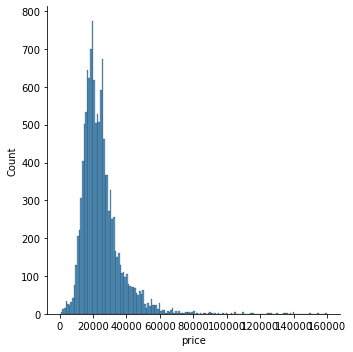

In [8]:
plt.figure(figsize= (10,10))
sbn.displot(dataFrame["price"])

C:\Users\zenit\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='count'>

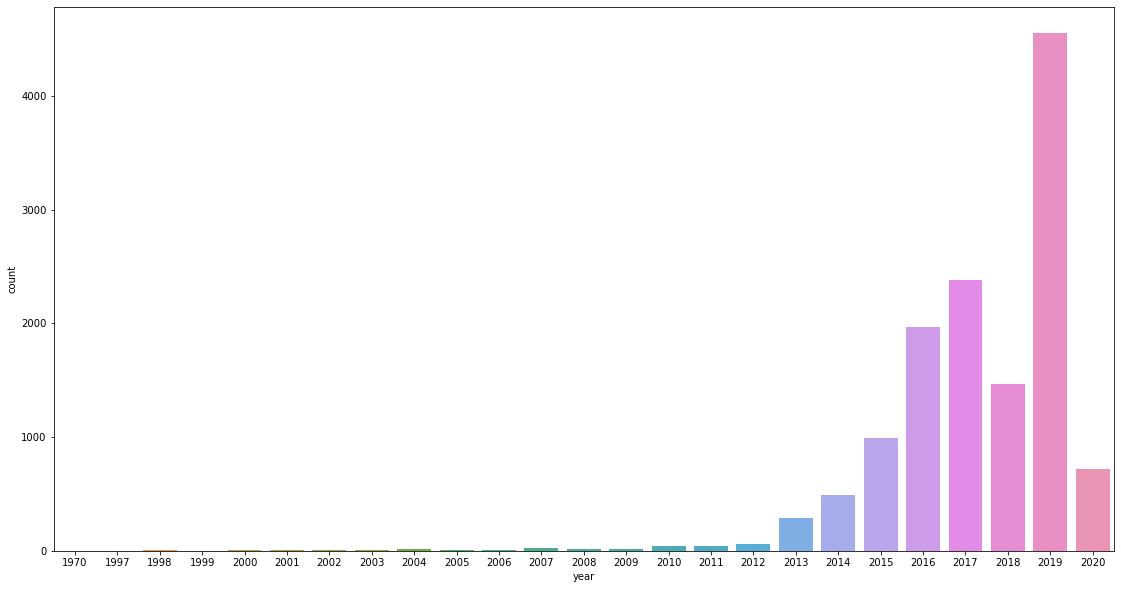

In [9]:
plt.figure(figsize= (19,10))
sbn.countplot(dataFrame["year"])

## Correlation değerlerine bakılır

In [10]:
dataFrame.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [11]:
dataFrame.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='year', ylabel='price'>

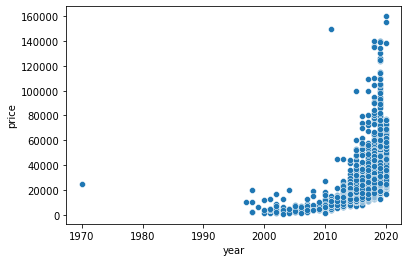

In [12]:
sbn.scatterplot(x = "year", y= "price", data= dataFrame)
# y değeri, ulaşılmak istenen hedef olmalıdır çizdirirken

In [13]:
dataFrame.sort_values("price", ascending= False ).head(40)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [14]:
len(dataFrame)

13119

In [15]:
## Genel yaklaşım verinin %99'unun tutulması ve gereksiz %1 verinin atılmasının
## verisetini bozmayacağı yönündedir

len(dataFrame)*0.01

131.19

In [16]:
## Yani karar verdiğimiz(buna displot ile karar verdik) yüksek fiyatlı arabalardan 131 tane
#3 çıkartırsak veriseti bozulmayacaktır

In [17]:
doksanDokuzlukVeri = dataFrame.sort_values("price",ascending=False).iloc[131:]

## Burada veriyi 131 değerden sonra başlatarak kaydettik ve pahalı 131 araba gitti

In [18]:
len(doksanDokuzlukVeri)
# verinin % 99 u

12988

<Figure size 1368x720 with 0 Axes>

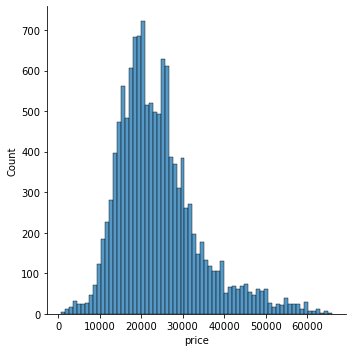

In [19]:
plt.figure(figsize=(19,10))
sbn.displot(doksanDokuzlukVeri["price"])

In [20]:
doksanDokuzlukVeri

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [21]:
doksanDokuzlukVeri.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [22]:
## Burada 1970 yılındaki saçma 24.000 lik değerden kurtulmak için dataframe'den çıkartılır

dataFrame = doksanDokuzlukVeri
dataFrame = dataFrame[dataFrame.year != 1970]

In [23]:
dataFrame

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [24]:
dataFrame.groupby("year").mean()["price"]
# artık 1970'teki veri gitmiştir

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [25]:
dataFrame = dataFrame.drop(["transmission"], axis=1)

# burada elbette labelencoding de yapılabilirdi ancak şimdilik bu veriye dataframe içerisinden
# çıkartıyoruz

In [26]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


## MODEL OLUŞTURMAK 

In [27]:
## İlk olarak x ve y belirlenir
y = dataFrame["price"].values
x = dataFrame.drop(["price"], axis= 1).values

In [28]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

## Scaler oluşturulur

In [31]:
from sklearn.preprocessing import MinMaxScaler


In [32]:
scaler = MinMaxScaler()

In [33]:
len(x_train)

9090

In [34]:
len(x_test)

3897

In [35]:
x_train = scaler.fit_transform(x_train)

In [36]:
x_test = scaler.transform(x_test) 

## Burada y_train ve y_test için scaling yapmadık

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
x_train.shape

(9090, 5)

In [39]:
model = Sequential()

model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))

#  4 adet katman eklendi
# update : model kötü eğitiyor, 5. katman eklendi

model.add(Dense(1)) # çıkış katmanı

# Çıkış katmanında activation func eklememize gerek yoktur

In [40]:
model.compile(optimizer="adam", loss="mse") 

# Compile için optimizer ve loss func seçildi

## Bu kısım önemli

In [41]:
model.fit(x=x_train, y = y_train,validation_data=(x_test,y_test),batch_size=250,epochs=200)
## batch size ise modele aynı anda 100000 tane veri vermek yerine bölerek bu verileri vermemiz
## anlamına gelir ki bu sebeple overfitting den de kaçınmış oluruz
## Burada 250 setler halinde data verilir modele

Epoch 1/200
37/37 [==============================] - 0s 6ms/step - loss: 672143488.0000 - val_loss: 688096576.0000
Epoch 2/200
37/37 [==============================] - 0s 2ms/step - loss: 672101760.0000 - val_loss: 688011328.0000
Epoch 3/200
37/37 [==============================] - 0s 2ms/step - loss: 671889984.0000 - val_loss: 687545856.0000
Epoch 4/200
37/37 [==============================] - 0s 2ms/step - loss: 670757824.0000 - val_loss: 685127040.0000
Epoch 5/200
37/37 [==============================] - 0s 2ms/step - loss: 665411392.0000 - val_loss: 674617792.0000
Epoch 6/200
37/37 [==============================] - 0s 2ms/step - loss: 645105984.0000 - val_loss: 638961344.0000
Epoch 7/200
37/37 [==============================] - 0s 2ms/step - loss: 586278656.0000 - val_loss: 546746880.0000
Epoch 8/200
37/37 [==============================] - 0s 2ms/step - loss: 456737152.0000 - val_loss: 371396192.0000
Epoch 9/200
37/37 [==============================] - 0s 2ms/step - loss: 2610373

Epoch 73/200
37/37 [==============================] - 0s 3ms/step - loss: 21663190.0000 - val_loss: 22821012.0000
Epoch 74/200
37/37 [==============================] - 0s 3ms/step - loss: 21567796.0000 - val_loss: 22674878.0000
Epoch 75/200
37/37 [==============================] - 0s 3ms/step - loss: 21432762.0000 - val_loss: 22586522.0000
Epoch 76/200
37/37 [==============================] - 0s 4ms/step - loss: 21368680.0000 - val_loss: 22598302.0000
Epoch 77/200
37/37 [==============================] - 0s 4ms/step - loss: 21295836.0000 - val_loss: 22467522.0000
Epoch 78/200
37/37 [==============================] - 0s 3ms/step - loss: 21207474.0000 - val_loss: 22445474.0000
Epoch 79/200
37/37 [==============================] - 0s 5ms/step - loss: 21159400.0000 - val_loss: 22596374.0000
Epoch 80/200
37/37 [==============================] - 0s 4ms/step - loss: 21091728.0000 - val_loss: 22415958.0000
Epoch 81/200
37/37 [==============================] - 0s 2ms/step - loss: 21003264.0000 

37/37 [==============================] - 0s 3ms/step - loss: 19020200.0000 - val_loss: 20372388.0000
Epoch 145/200
37/37 [==============================] - 0s 4ms/step - loss: 18938200.0000 - val_loss: 20417742.0000
Epoch 146/200
37/37 [==============================] - 0s 3ms/step - loss: 18966806.0000 - val_loss: 20424740.0000
Epoch 147/200
37/37 [==============================] - 0s 3ms/step - loss: 18938628.0000 - val_loss: 20277452.0000
Epoch 148/200
37/37 [==============================] - 0s 3ms/step - loss: 18924566.0000 - val_loss: 20366296.0000
Epoch 149/200
37/37 [==============================] - 0s 3ms/step - loss: 18889012.0000 - val_loss: 20273740.0000
Epoch 150/200
37/37 [==============================] - 0s 3ms/step - loss: 18904628.0000 - val_loss: 20232530.0000
Epoch 151/200
37/37 [==============================] - 0s 3ms/step - loss: 18848522.0000 - val_loss: 20187346.0000
Epoch 152/200
37/37 [==============================] - 0s 3ms/step - loss: 18822942.0000 - val

In [42]:
lossData = pd.DataFrame(model.history.history)

In [43]:
lossData

,loss,val_loss
0,672143488.0,688096576.0
1,672101760.0,688011328.0
2,671889984.0,687545856.0
3,670757824.0,685127040.0
4,665411392.0,674617792.0
...,...,...
195,18404172.0,19728742.0
196,18337232.0,19741238.0
197,18352162.0,19717116.0
198,18329596.0,19706192.0


<AxesSubplot:>

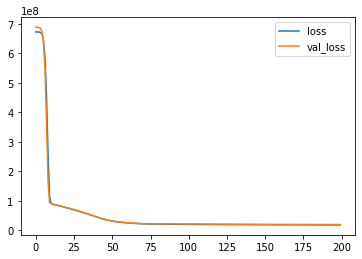

In [44]:
lossData.plot()

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [51]:
tahminDizisi = model.predict(x_test)

In [52]:
tahminDizisi

array([[21493.008],
       [22807.83 ],
       [24419.37 ],
       ...,
       [25986.404],
       [17021.656],
       [24140.732]], dtype=float32)

In [54]:
mean_squared_error(y_test,tahminDizisi)

19710955.491070215

In [56]:
mean_absolute_error(y_test, tahminDizisi)

3175.686020371239

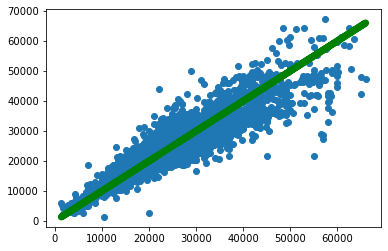

In [61]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g", linewidth= 7)

In [62]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [65]:
dataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [66]:
yeniArabaSeries = dataFrame.drop("price", axis=1).iloc[2]

In [67]:
yeniArabaSeries

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [68]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))

# reshape yapıldı çünkü tek boyutlu olarak görüyor 

In [69]:
yeniArabaSeries

array([[1.        , 0.01543635, 0.25      , 0.12442183, 0.64516129]])

In [74]:
yeniArabaPredict = model.predict(yeniArabaSeries)

## Seçilen arabanın değeri  65980.0
## Tahmin değer

In [79]:
yeniArabaPredict
## Tahmin değeri 62528

array([[62528.152]], dtype=float32)